# Лабораторная работа № 2
## Студент: Спиридонов К.А. М8О-107М-23

### Задачи:
Глобальная оптимизация и метаэврестические алгоритмы
   - В `pygmo` запрогроммировать две своих тестовых функции и найти их оптимум 3 разными алгоритмами доступными в библиотеке и получить таблицу сравнения

In [1]:
!pip install pygmo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 49.0 MB/s eta 0:00:00


In [10]:
import pygmo as pg
import numpy as np

from matplotlib import pyplot as plt
from numpy import linalg as la
import matplotlib.animation as animation
from IPython.display import HTML
import autograd
import math

In [46]:
def draw_fun(function_info: callable, title: str) -> None:

    fun = function_info.fitness
    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection = '3d')

    domain = np.array(list(function_info.get_bounds()))

    x = np.linspace(domain[0, 0], domain[1, 0], 100)
    y = np.linspace(domain[0, 1], domain[1, 1], 100)

    x_grid, y_grid = np.meshgrid(x, y)
    z_grid = fun(np.array([x_grid, y_grid]))[0]

    ax.plot_surface(x_grid, y_grid, z_grid, cmap = 'plasma', alpha=0.5)

    ax.set_title(title, fontsize = 12, fontweight="bold",loc="left")
    ax.legend(loc="upper left")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

In [4]:
class sphere_function:
    def __init__(self, dim):
        self.dim = dim

    def fitness(self, x):
        return [sum(x*x)]

    def get_bounds(self):
        return ([-1] * self.dim, [1] * self.dim)

    def get_name(self):
        return "Sphere Function"

    def get_extra_info(self):
        return "\tDimensions: " + str(self.dim)

In [5]:
shpere_fun = sphere_function(2)

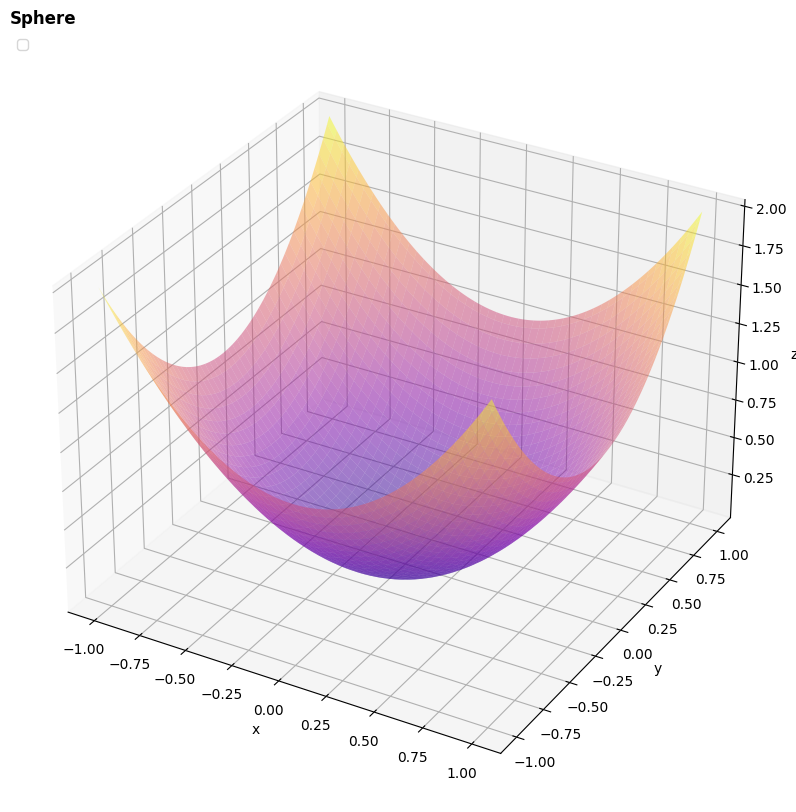

In [47]:
draw_fun(shpere_fun, "Sphere")

In [77]:
class booth_function:
    def __init__(self):
        self.dim = 2

    def fitness(self, x):
        return [(x[0] + 2 * x[1] - 7) ** 2 + (2 * x[0] + x[1] - 5) ** 2]

    def get_bounds(self):
        return ([-10, -10], [10, 10])

    def get_name(self):
        return "Booth Function"

    def get_extra_info(self):
        return "\tDimensions: " + str(self.dim)

In [54]:
booth_fun = booth_function()

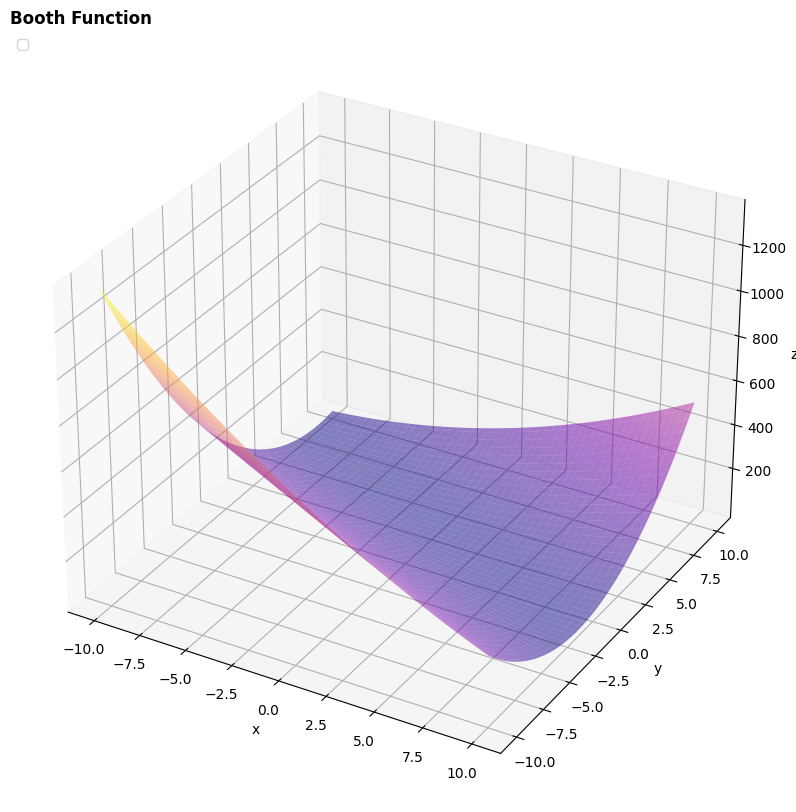

In [55]:
draw_fun(booth_fun, "Booth Function")

In [56]:
algorithms = [pg.bee_colony(gen = 1000, limit = 1000, seed = 10), pg.gwo(gen = 1000, seed = 10), pg.sea(gen = 1000, seed = 10)]
for algo in algorithms:
    print(pg.algorithm(algo))

Algorithm name: ABC: Artificial Bee Colony [stochastic]
	C++ class name: pagmo::bee_colony

	Thread safety: basic

Extra info:
	Maximum number of generations: 1000
	Limit: 1000
	Verbosity: 0
	Seed: 10
Algorithm name: GWO: Grey Wolf Optimizer [stochastic]
	C++ class name: pagmo::gwo

	Thread safety: basic

Extra info:
	Generations: 1000
	Verbosity: 0
	Seed: 10
Algorithm name: SEA: (N+1)-EA Simple Evolutionary Algorithm [stochastic]
	C++ class name: pagmo::sea

	Thread safety: basic

Extra info:
	Generations: 1000
	Verbosity: 0
	Seed: 10


In [66]:
def examine_function(function_info: callable, algorithms) -> None:
    prob = pg.problem(function_info)

    for algorithm in algorithms:
        print('='*80)
        # The problem
        prob = pg.problem(function_info)
        # The initial population
        pop = pg.population(prob, size = 10)
        print(pop)
        # The algorithm
        algo = pg.algorithm(algorithm)
        # The actual optimization process
        pop = algo.evolve(pop)
        print(pop)
        print('='*80)


In [69]:
examine_function(sphere_function(2), algorithms)

Problem name: Sphere Function
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-1, -1]
	Upper bounds: [1, 1]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 10

	Thread safety: none

Extra info:
	Dimensions: 2
Population size: 10

List of individuals: 
#0:
	ID:			13772631210843857635
	Decision vector:	[0.0833175, -0.230594]
	Fitness vector:		[0.0601154]
#1:
	ID:			11439889106203264142
	Decision vector:	[-0.996415, -0.760971]
	Fitness vector:		[1.57192]
#2:
	ID:			1825243929390174637
	Decision vector:	[-0.632636, -0.374285]
	Fitness vector:		[0.540317]
#3:
	ID:			2929608331487977119
	Decision vector:	[-0.293322, -0.473859]
	Fitness vector:		[0.31058]
#4:
	ID:			24795949630430077

In [78]:
examine_function(booth_function(), algorithms)

Problem name: Booth Function
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [-10, -10]
	Upper bounds: [10, 10]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 10

	Thread safety: none

Extra info:
	Dimensions: 2
Population size: 10

List of individuals: 
#0:
	ID:			15805827181583223022
	Decision vector:	[7.76063, -4.8439]
	Fitness vector:		[111.927]
#1:
	ID:			14868603306428903493
	Decision vector:	[-7.70214, -4.91186]
	Fitness vector:		[1242.42]
#2:
	ID:			7790284495165071393
	Decision vector:	[8.78552, -6.99448]
	Fitness vector:		[180.022]
#3:
	ID:			11967984436442146570
	Decision vector:	[-5.22878, 7.45862]
	Fitness vector:		[71.2108]
#4:
	ID:			9612792926843494953
	Decisio